# Data collection 
Collecting data from https://webscraper.io/test-sites/e-commerce/static/computers/laptops

There are 20 web pages where each page contains the general information (e.g., complete title, URL, price, number of reviews, rating) about computers/laptop.


##  Data collection


In [174]:
# import packages
import requests
from lxml import html
import pandas as pd
import csv
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [175]:
# collect data from page 1 
r = requests.get('https://webscraper.io/test-sites/e-commerce/static/computers/laptops')
data = html.fromstring(r.text)
for review in data.xpath("//div[@class='thumbnail']"):
    title = review.xpath("div[1]/h4/a/text()")
    url = review.xpath("div[1]/h4/a/@href")
    price = review.xpath("div[1]/h4[1]/text()")
    n_review=review.xpath("div[2]/p[1]/text()")
    rating=review.xpath("div[2]/p[2]/@data-rating")
    print(title,url,price,n_review,rating)

['Packard 255 G2'] ['/test-sites/e-commerce/static/product/516'] ['$416.99'] ['2 reviews'] ['2']
['Aspire E1-510'] ['/test-sites/e-commerce/static/product/517'] ['$306.99'] ['2 reviews'] ['3']
['ThinkPad T540p'] ['/test-sites/e-commerce/static/product/518'] ['$1178.99'] ['2 reviews'] ['1']
['ProBook'] ['/test-sites/e-commerce/static/product/519'] ['$739.99'] ['8 reviews'] ['4']
['ThinkPad X240'] ['/test-sites/e-commerce/static/product/520'] ['$1311.99'] ['12 reviews'] ['3']
['Aspire E1-572G'] ['/test-sites/e-commerce/static/product/521'] ['$581.99'] ['2 reviews'] ['1']


In [176]:
#figure out the urls for the web pages.
web = "https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=%s" 

# let's get the first four urls
for page in range(1,21):
    print(web % page)

https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=1
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=2
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=3
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=4
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=5
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=6
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=7
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=8
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=9
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=10
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=11
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=12
https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?pag

In [177]:
#crawl a large data from all the pages
finaldata=[]
web = "https://webscraper.io/test-sites/e-commerce/static/computers/laptops/?page=%s" 
for page in range(1,21):
    url = web % page
    data = html.fromstring(requests.get(url).text)
    
    for review in data.xpath("//div[@class='thumbnail']"):
        title = review.xpath("div[1]/h4/a/text()")
        url = review.xpath("div[1]/h4/a/@href")
        price = review.xpath("div[1]/h4[1]/text()")
        n_review=review.xpath("div[2]/p[1]/text()")
        rating=review.xpath("div[2]/p[2]/@data-rating")
        description=review.xpath("div[1]/p[1]/text()")
        finaldata.append([title,url,price,n_review,rating,description])
        
len(finaldata)

117

In [178]:
# convert to dataframe
df =pd.DataFrame(finaldata) 
df.head(2)

,0,1,2,3,4,5
0,[Packard 255 G2],[/test-sites/e-commerce/static/product/516],[$416.99],[2 reviews],[2],"[15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Window..."
1,[Aspire E1-510],[/test-sites/e-commerce/static/product/517],[$306.99],[2 reviews],[3],"[15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux]"


In [179]:
#remove brackets
df[0]=df[0].str[0]
df[1]=df[1].str[0]
df[2]=df[2].str[0]
df[3]=df[3].str[0]
df[4]=df[4].str[0]
df[5]=df[5].str[0]
df.head()

,0,1,2,3,4,5
0,Packard 255 G2,/test-sites/e-commerce/static/product/516,$416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows..."
1,Aspire E1-510,/test-sites/e-commerce/static/product/517,$306.99,2 reviews,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux"
2,ThinkPad T540p,/test-sites/e-commerce/static/product/518,$1178.99,2 reviews,1,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit"
3,ProBook,/test-sites/e-commerce/static/product/519,$739.99,8 reviews,4,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit"
4,ThinkPad X240,/test-sites/e-commerce/static/product/520,$1311.99,12 reviews,3,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro..."


In [180]:
# rename columns (title, url, price)
df.columns = ['name','url','price','reviews','rating','description']
df.head()

,name,url,price,reviews,rating,description
0,Packard 255 G2,/test-sites/e-commerce/static/product/516,$416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows..."
1,Aspire E1-510,/test-sites/e-commerce/static/product/517,$306.99,2 reviews,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux"
2,ThinkPad T540p,/test-sites/e-commerce/static/product/518,$1178.99,2 reviews,1,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit"
3,ProBook,/test-sites/e-commerce/static/product/519,$739.99,8 reviews,4,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit"
4,ThinkPad X240,/test-sites/e-commerce/static/product/520,$1311.99,12 reviews,3,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro..."


In [181]:
df['link'] = 'https://webscraper.io'  + df['url']
df.head()

,name,url,price,reviews,rating,description,link
0,Packard 255 G2,/test-sites/e-commerce/static/product/516,$416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",https://webscraper.io/test-sites/e-commerce/st...
1,Aspire E1-510,/test-sites/e-commerce/static/product/517,$306.99,2 reviews,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",https://webscraper.io/test-sites/e-commerce/st...
2,ThinkPad T540p,/test-sites/e-commerce/static/product/518,$1178.99,2 reviews,1,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit",https://webscraper.io/test-sites/e-commerce/st...
3,ProBook,/test-sites/e-commerce/static/product/519,$739.99,8 reviews,4,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit",https://webscraper.io/test-sites/e-commerce/st...
4,ThinkPad X240,/test-sites/e-commerce/static/product/520,$1311.99,12 reviews,3,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro...",https://webscraper.io/test-sites/e-commerce/st...


In [182]:
# Drop the 'url' column
df.drop(columns=['url'], inplace=True)
df.head()

,name,price,reviews,rating,description,link
0,Packard 255 G2,$416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",https://webscraper.io/test-sites/e-commerce/st...
1,Aspire E1-510,$306.99,2 reviews,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",https://webscraper.io/test-sites/e-commerce/st...
2,ThinkPad T540p,$1178.99,2 reviews,1,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit",https://webscraper.io/test-sites/e-commerce/st...
3,ProBook,$739.99,8 reviews,4,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit",https://webscraper.io/test-sites/e-commerce/st...
4,ThinkPad X240,$1311.99,12 reviews,3,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro...",https://webscraper.io/test-sites/e-commerce/st...


##  Data cleaning & transformation 

In [183]:
# inspecting the number of rows in your dataframe
df.shape

(117, 6)

* There are 117 rows and 6 columns in the dataset.

In [184]:
#checking data types
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        117 non-null    object 
 1   url          117 non-null    object 
 2   price        117 non-null    object 
 3   review       117 non-null    object 
 4   rating       117 non-null    object 
 5   description  0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 5.6+ KB


In [185]:
# checking missing values
df.isnull().sum()

name           0
price          0
reviews        0
rating         0
description    0
link           0
dtype: int64

In [186]:
# converting object data type to float for rating column
df['rating']=pd.to_numeric(df['rating'])
df.head(2)

,name,price,reviews,rating,description,link
0,Packard 255 G2,$416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",https://webscraper.io/test-sites/e-commerce/st...
1,Aspire E1-510,$306.99,2 reviews,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",https://webscraper.io/test-sites/e-commerce/st...


In [187]:
# export the crawled data to a csv file (myscrapedata.csv)
df.to_csv('myscrapedata.csv', index=False)

# Data Understanding & EDA

## Inspect Data

In [188]:
# read the finaldf.csv as dataframe
df = pd.read_csv("myscrapedata.csv")
df.head(2)

,name,price,reviews,rating,description,link
0,Packard 255 G2,$416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",https://webscraper.io/test-sites/e-commerce/st...
1,Aspire E1-510,$306.99,2 reviews,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",https://webscraper.io/test-sites/e-commerce/st...


### Slicing data

In [189]:
# view 1st row
df.iloc[0:1,]

,name,price,reviews,rating,description,link
0,Packard 255 G2,$416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",https://webscraper.io/test-sites/e-commerce/st...


In [190]:
# selecting 3rd and 5th column, 2nd through 4th rows
df.loc[1:4,['price','reviews']]

,price,reviews
1,$306.99,2 reviews
2,$1178.99,2 reviews
3,$739.99,8 reviews
4,$1311.99,12 reviews


### Create new columns 

In [191]:
# the first "word" in the name column is computer brand/model (e.g., HP, Dell, Inspiron)
# create a new column "brandmodel"
df['brandmodel'] = [x.split()[0] for x in df['name']]
df.head()

,name,price,reviews,rating,description,link,brandmodel
0,Packard 255 G2,$416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",https://webscraper.io/test-sites/e-commerce/st...,Packard
1,Aspire E1-510,$306.99,2 reviews,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",https://webscraper.io/test-sites/e-commerce/st...,Aspire
2,ThinkPad T540p,$1178.99,2 reviews,1,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit",https://webscraper.io/test-sites/e-commerce/st...,ThinkPad
3,ProBook,$739.99,8 reviews,4,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit",https://webscraper.io/test-sites/e-commerce/st...,ProBook
4,ThinkPad X240,$1311.99,12 reviews,3,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro...",https://webscraper.io/test-sites/e-commerce/st...,ThinkPad


In [192]:
# how many unique computer brands/models (e.g., HP, Dell, Inspiron) are represented in the data? 
# and what are they?
df['brandmodel'].nunique()

16

* There are **16** unique computer brands/models (e.g., HP, Dell, Inspiron) are represented in the data

In [193]:
# unique computer brands/models
df['brandmodel'].unique()

array(['Packard', 'Aspire', 'ThinkPad', 'ProBook', 'Pavilion', 'Inspiron',
       'Dell', 'HP', 'Asus', 'Acer', 'Lenovo', 'Prestigio', 'Hewlett',
       'MSI', 'Toshiba', 'Apple'], dtype=object)

* The unique computer brands/models are _'Packard', 'Aspire', 'ThinkPad', 'ProBook', 'Pavilion', 'Inspiron','Dell', 'HP', 'Asus', 'Acer', 'Lenovo', 'Prestigio', 'Hewlett', 'MSI', 'Toshiba', 'Apple'_.

In [194]:
# create a new column "productnumber"
# the url column contains product number (e.g., 516). 
# For example, extract 516 from the URL /test-sites/e-commerce/static/product/516
df['product_number'] = df["link"].str.replace("https://webscraper.io/test-sites/e-commerce/static/product/","")
df.head()

C:\Users\light\AppData\Local\Temp\ipykernel_32248\2205175538.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['product_number'] = df["link"].str.replace("https://webscraper.io/test-sites/e-commerce/static/product/","")


,name,price,reviews,rating,description,link,brandmodel,product_number
0,Packard 255 G2,$416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",https://webscraper.io/test-sites/e-commerce/st...,Packard,516
1,Aspire E1-510,$306.99,2 reviews,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",https://webscraper.io/test-sites/e-commerce/st...,Aspire,517
2,ThinkPad T540p,$1178.99,2 reviews,1,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit",https://webscraper.io/test-sites/e-commerce/st...,ThinkPad,518
3,ProBook,$739.99,8 reviews,4,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit",https://webscraper.io/test-sites/e-commerce/st...,ProBook,519
4,ThinkPad X240,$1311.99,12 reviews,3,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro...",https://webscraper.io/test-sites/e-commerce/st...,ThinkPad,520


In [195]:
# how many unique product number
df['product_number'].nunique()

117

* There are **117** unique product numbers.

In [196]:
# remove $ sign from price and change the data type to float
df['price']=df['price'].str.replace('$', '',regex=True)
df.head(2)

,name,price,reviews,rating,description,link,brandmodel,product_number
0,Packard 255 G2,416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",https://webscraper.io/test-sites/e-commerce/st...,Packard,516
1,Aspire E1-510,306.99,2 reviews,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",https://webscraper.io/test-sites/e-commerce/st...,Aspire,517


In [197]:
# show data types
df.dtypes

name              object
price             object
reviews           object
rating             int64
description       object
link              object
brandmodel        object
product_number    object
dtype: object

In [198]:
# convert the price column to numeric & check the data types
df['price']=pd.to_numeric(df['price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            117 non-null    object 
 1   price           117 non-null    float64
 2   reviews         117 non-null    object 
 3   rating          117 non-null    int64  
 4   description     117 non-null    object 
 5   link            117 non-null    object 
 6   brandmodel      117 non-null    object 
 7   product_number  117 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.4+ KB


## EDA

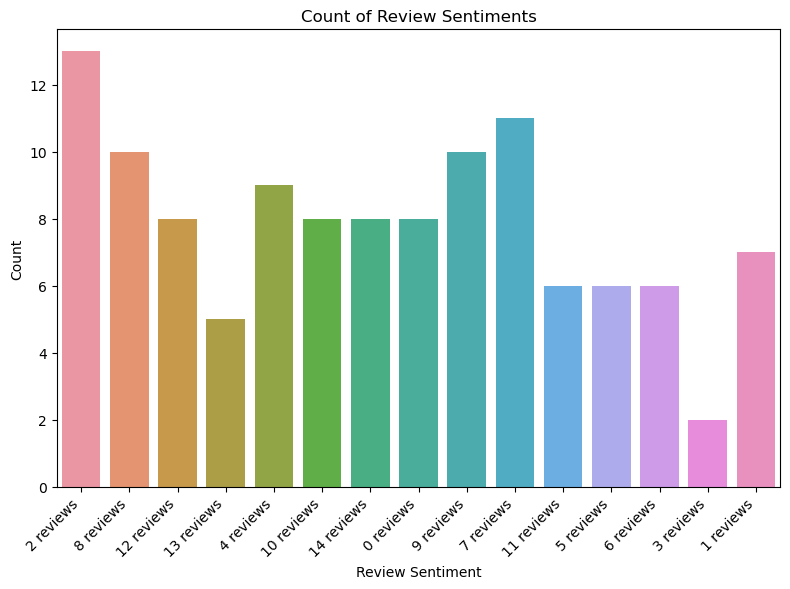

In [199]:
# Group by 'reviews' and plot bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='reviews')

# Set plot labels and title
plt.xlabel('Review Sentiment')
plt.ylabel('Count')
plt.title('Count of Review Sentiments')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# Show the plot
plt.tight_layout()
plt.show()

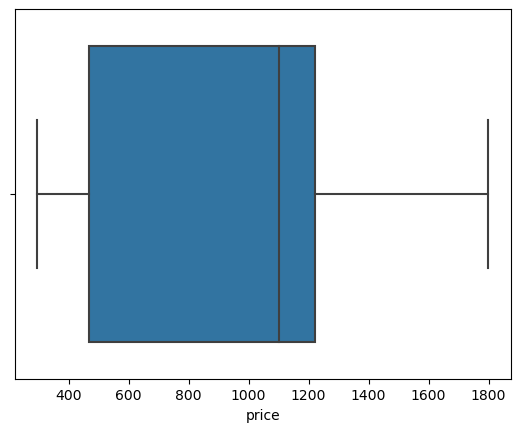

In [200]:
# Create a box plot using Seaborn for price column
sns.boxplot(x=df['price'])

# Show the plot
plt.show()

In [201]:
# what is the most and least expensive computer?
print(df['price'].max())
print(df['price'].min())

1799.0
295.99


* The most expensive computer is **1799** and the cheapest is **295.99**

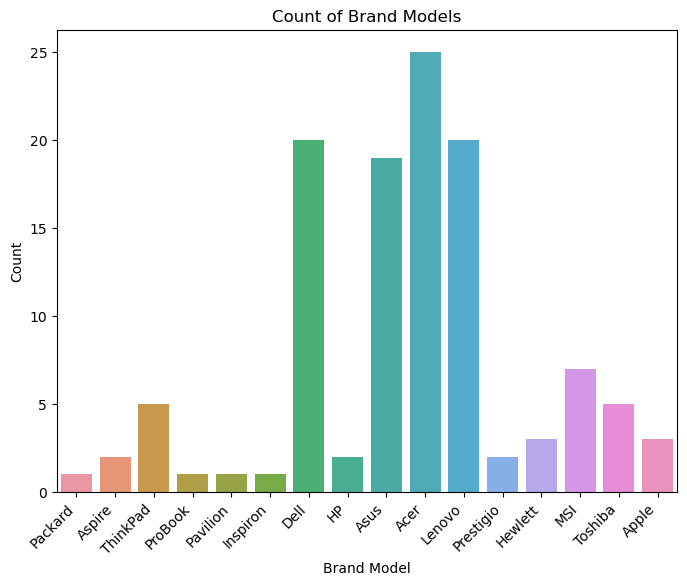

In [202]:
# Group by 'brandmodel' and plot grouped bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='brandmodel')

# Set plot labels and title
plt.xlabel('Brand Model')
plt.ylabel('Count')
plt.title('Count of Brand Models')
# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
# Show the plot
plt.show()

* The most popular brandmodel in the dataset is **Acer**.

In [203]:
# how many products have Windows as operating system? This information is in the description column
# create a 'windows' boolean column
df['windows']=df.description.str.contains("Win")
df.head(2)

,name,price,reviews,rating,description,link,brandmodel,product_number,windows
0,Packard 255 G2,416.99,2 reviews,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",https://webscraper.io/test-sites/e-commerce/st...,Packard,516,True
1,Aspire E1-510,306.99,2 reviews,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",https://webscraper.io/test-sites/e-commerce/st...,Aspire,517,False


In [204]:
# show the number of True and False
df.groupby('windows').size()

windows
False    24
True     93
dtype: int64

* **93** products have Windows as operating system.

In [205]:
# how many products have non-Windows operating system?
# show the number of True and False
df.groupby('windows').size()

windows
False    24
True     93
dtype: int64

* **24** products have non-Windows operating system.

In [206]:
# remove useless words in 'reviews' column
df['reviews'] = df["reviews"].str.replace(" reviews","")
df.head()

,name,price,reviews,rating,description,link,brandmodel,product_number,windows
0,Packard 255 G2,416.99,2,2,"15.6"", AMD E2-3800 1.3GHz, 4GB, 500GB, Windows...",https://webscraper.io/test-sites/e-commerce/st...,Packard,516,True
1,Aspire E1-510,306.99,2,3,"15.6"", Pentium N3520 2.16GHz, 4GB, 500GB, Linux",https://webscraper.io/test-sites/e-commerce/st...,Aspire,517,False
2,ThinkPad T540p,1178.99,2,1,"15.6"", Core i5-4200M, 4GB, 500GB, Win7 Pro 64bit",https://webscraper.io/test-sites/e-commerce/st...,ThinkPad,518,True
3,ProBook,739.99,8,4,"14"", Core i5 2.6GHz, 4GB, 500GB, Win7 Pro 64bit",https://webscraper.io/test-sites/e-commerce/st...,ProBook,519,True
4,ThinkPad X240,1311.99,12,3,"12.5"", Core i5-4300U, 8GB, 240GB SSD, Win7 Pro...",https://webscraper.io/test-sites/e-commerce/st...,ThinkPad,520,True


In [207]:
# Each product received reviews (e.g., 2, 3). What is the average number of reviews received?
# convert the price column to numeric & check the data types
df['reviews']=pd.to_numeric(df['reviews'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            117 non-null    object 
 1   price           117 non-null    float64
 2   reviews         117 non-null    int64  
 3   rating          117 non-null    int64  
 4   description     117 non-null    object 
 5   link            117 non-null    object 
 6   brandmodel      117 non-null    object 
 7   product_number  117 non-null    object 
 8   windows         117 non-null    bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 7.6+ KB
